In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100) 

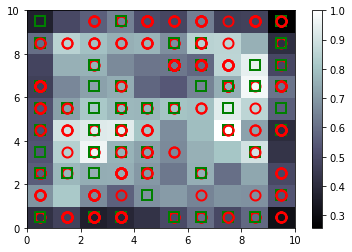

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

In [8]:
#Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,4)], mappings[(8, 6)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [9]:
fraud_df = pd.DataFrame(data=frauds)
fraud_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15591010.0,1.0,47.83,4.165,2.0,14.0,5.0,0.085,0.0,0.0,0.0,1.0,2.0,520.0,1.0
1,15716347.0,1.0,35.17,4.500,2.0,14.0,8.0,5.750,0.0,0.0,0.0,1.0,1.0,711.0,1.0
2,15620832.0,1.0,37.33,2.665,2.0,13.0,4.0,0.165,0.0,0.0,0.0,1.0,2.0,0.0,502.0
3,15789201.0,1.0,18.50,2.000,2.0,3.0,4.0,1.500,1.0,1.0,2.0,0.0,2.0,120.0,301.0
4,15777994.0,1.0,42.00,9.790,2.0,14.0,8.0,7.960,1.0,1.0,8.0,0.0,2.0,0.0,1.0
5,15735837.0,1.0,52.50,6.500,2.0,4.0,4.0,6.290,1.0,1.0,15.0,0.0,2.0,0.0,11203.0
6,15778290.0,1.0,25.00,11.250,2.0,8.0,4.0,2.500,1.0,1.0,17.0,0.0,2.0,200.0,1209.0
7,15799785.0,1.0,56.42,28.000,1.0,8.0,4.0,28.500,1.0,1.0,40.0,0.0,2.0,0.0,16.0
8,15810723.0,1.0,38.17,10.125,2.0,14.0,4.0,2.500,1.0,1.0,6.0,0.0,2.0,520.0,197.0
9,15751137.0,1.0,33.58,2.750,2.0,7.0,4.0,4.250,1.0,1.0,6.0,0.0,2.0,204.0,1.0
